# FINAL PROJECT -  ADULT CENSUS INCOME

**Objective**<br>
* Make a model to predict whether the income of an adult will exceed 50k per year or not

**Nama Kelompok : Byte Me**<br>
1. Siva Putri Sadinanti
2. Gary
3. Yulia Syoyana
4. Julio Putra David
5. Yusuf Arifin

**Content**<br>
* Data understanding : Analisis data kemudian jelaskan<br>
* Data preparation : jelaskan alasan melakukan suatu perubahan pada data<br>
* Modeling : jelaskan alasan memilih suatu algoritma untuk dijadikan model<br>
* Evaluasi : jelaskan evaluasi dari algoritma yang digunakan<br>
* Insight : jelaskan insight yang didapatkan<br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Understanding

## Load Data

In [2]:
df = pd.read_csv('adult.csv')
print('Total Row', df.shape[0],';','Total Columns', df.shape[1],'\n')
df.head()

Total Row 32561 ; Total Columns 15 



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

## Numerical Data

In [5]:
num_df = df.select_dtypes(include='int64')
numerical = num_df.columns
print('Total Numerical:', numerical.shape[0] ,',', numerical)

Total Numerical: 6 , Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [6]:
df[numerical].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical Data

In [7]:
cat_df = df.select_dtypes(include='object')
categorical = cat_df.columns
print('Total Categorical:', categorical.shape[0],',', categorical)

Total Categorical: 9 , Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [8]:
df[categorical].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Check Null, Missing Value & Duplicate Data

In [9]:
# check null

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
# check missing values '?'

for i in df.columns:
    print(i, df.loc[df[i] == '?', i].size)

age 0
workclass 1836
fnlwgt 0
education 0
education.num 0
marital.status 0
occupation 1843
relationship 0
race 0
sex 0
capital.gain 0
capital.loss 0
hours.per.week 0
native.country 583
income 0


In [11]:
# check duplicated data

print('Total duplicated data :', df.duplicated().sum())

Total duplicated data : 24


# Data Preparation

## Handling Duplicates

In [12]:
df = df[~df.duplicated()]
df.shape

(32537, 15)

## Handling Missing Value

In [13]:
#drop rows with missing values (contain '?' mark)

df = df[~(df['workclass'] == '?')]
df = df[~(df['occupation'] == '?')]
df = df[~(df['native.country'] == '?')]

df.shape

(30139, 15)

In [67]:
df.shape

(30139, 61)

In [84]:
df['income'].reset_index()

,index,income
0,1,0.0
1,3,0.0
2,4,0.0
3,5,0.0
4,6,0.0
...,...,...
30134,32556,0.0
30135,32557,0.0
30136,32558,1.0
30137,32559,0.0


In [86]:
cat_hue('income')

TypeError: cat_hue() missing 1 required positional argument: 'y'

## EDA, Transform & Feature Engineering

In [14]:
def cat_hue(x,y):
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=8.27, aspect=20.7/8.27)
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)


### age

<AxesSubplot:xlabel='age', ylabel='Count'>

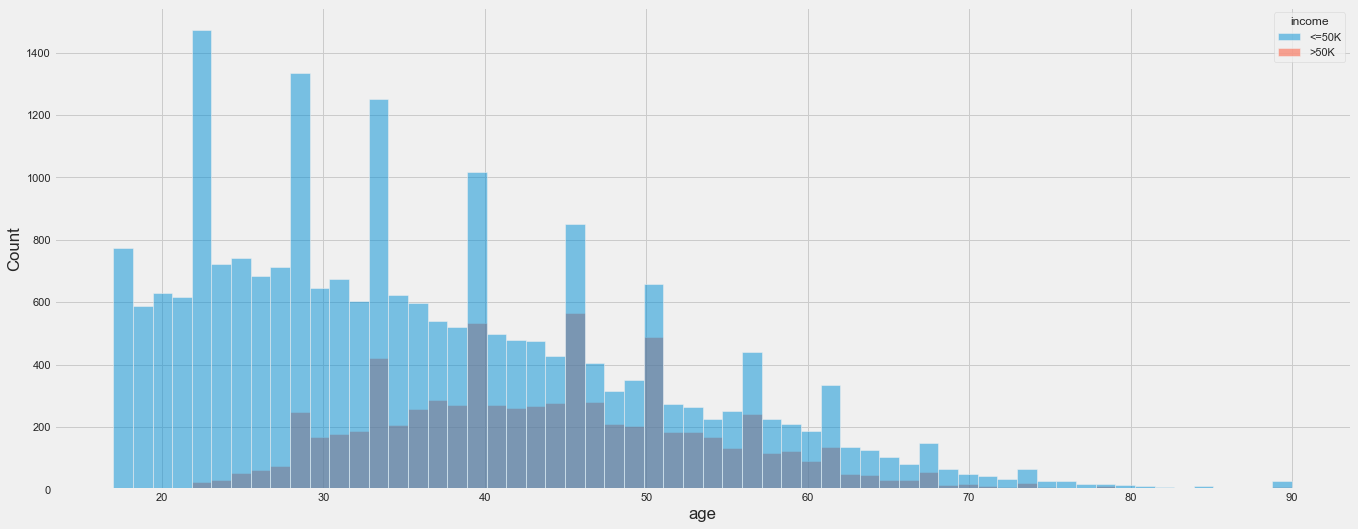

In [15]:
sns.histplot(x='age', hue='income', data = df)

### age.productive

In [16]:
# add column 'age.productive'

def segment(x):
    if x['age'] >= 50 and x['age'] <80 :
        segment = 'Most Productive Age'
    elif x['age'] >= 30 and x['age'] <50 :
        segment = 'Productive Age'
    else:
        segment = 'Less Productive Age'
    return segment
df['age.productive'] = df.apply(lambda x: segment(x), axis=1)

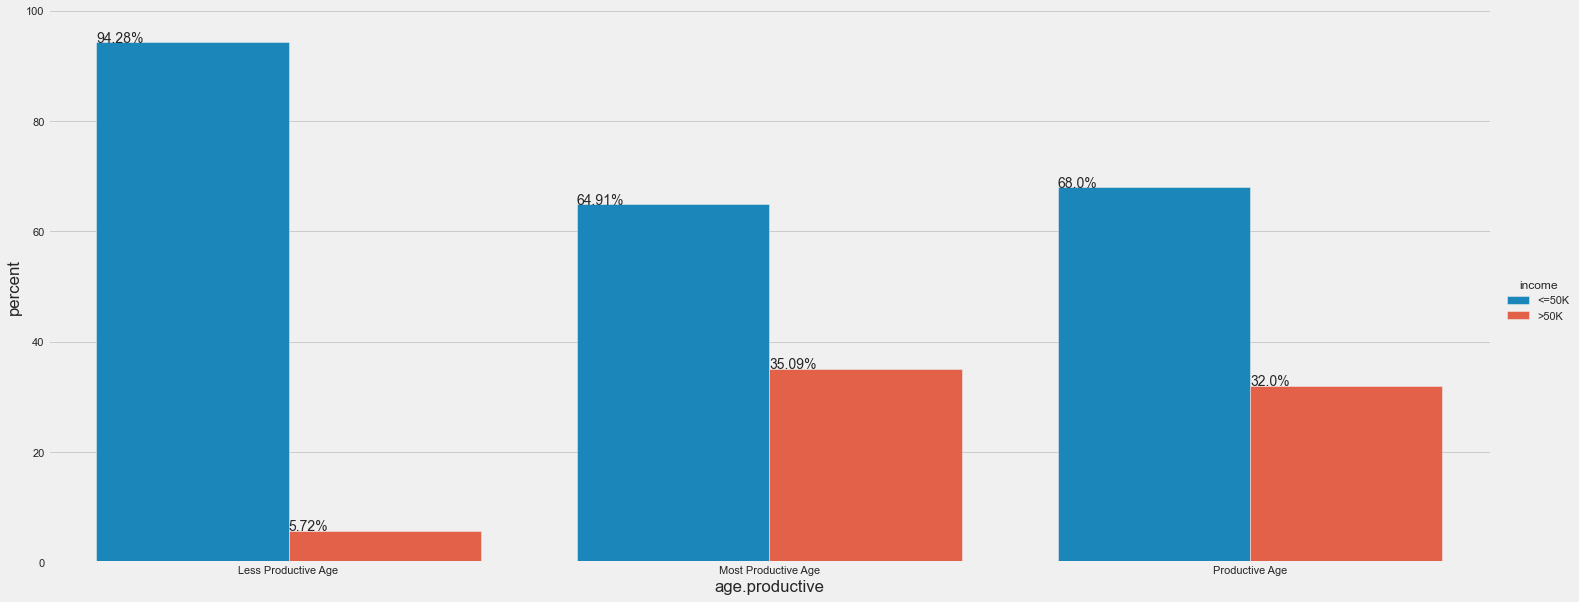

In [17]:
cat_hue('age.productive','income')

### workclass

In [18]:
df['workclass'].value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [19]:
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-Employed')
df['workclass'] = df['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Government')

df['workclass'].value_counts()

Private          22264
Government        4289
Self-Employed     3572
Without-pay         14
Name: workclass, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


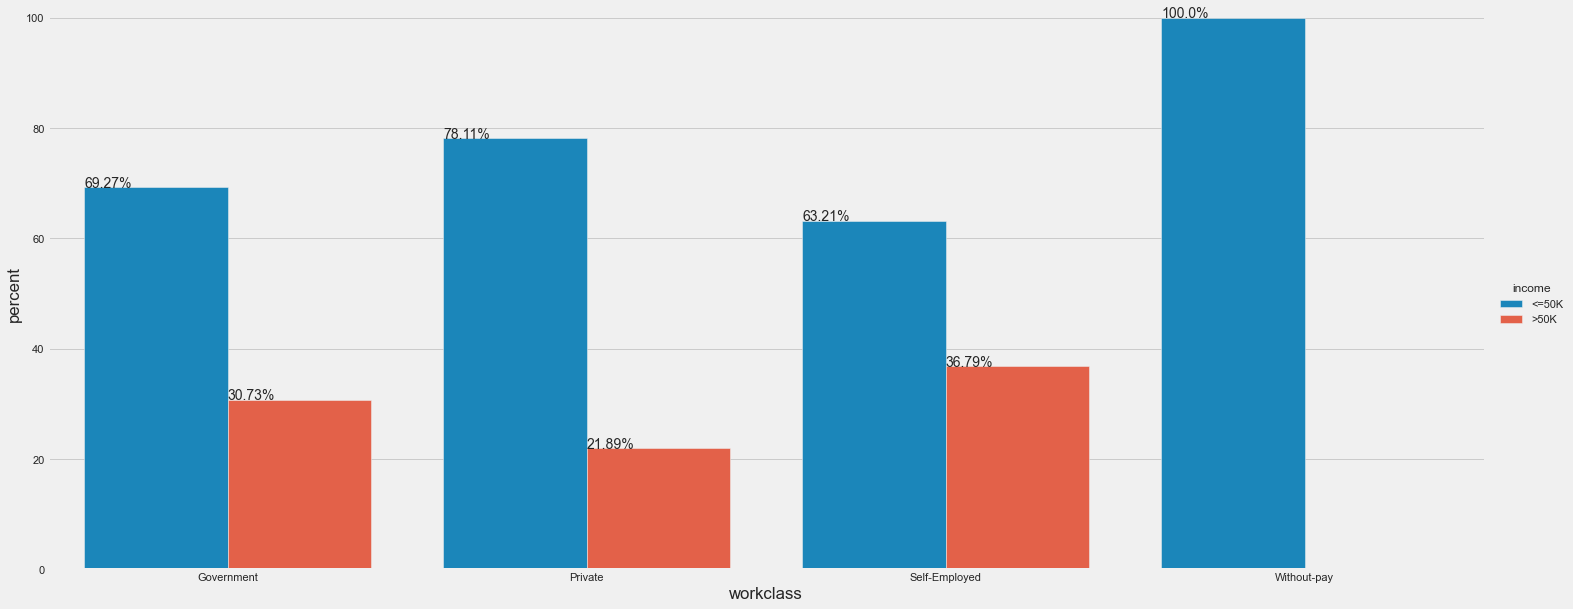

In [20]:
cat_hue('workclass','income')

### education

In [21]:
df['education'].value_counts()

HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


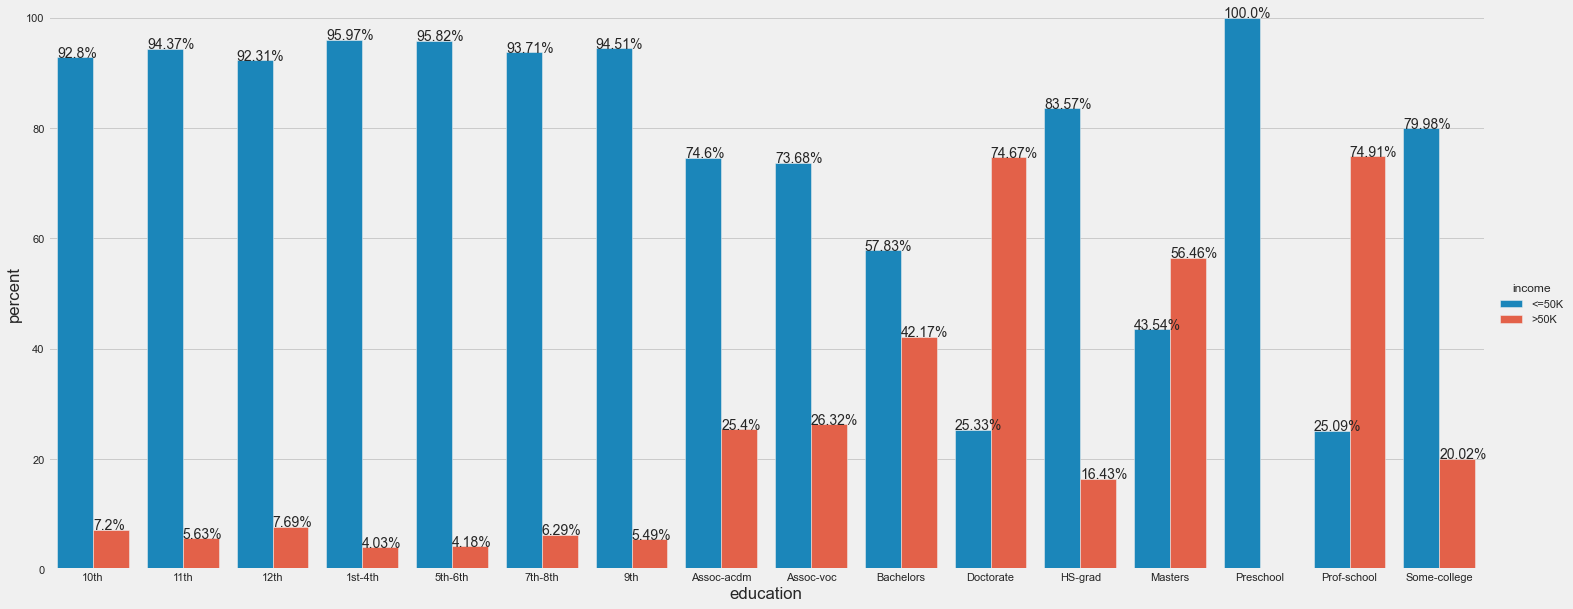

In [22]:
cat_hue('education','income')

### education.num

In [23]:
df['education.num'].value_counts()

9     9834
10    6669
13    5042
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: education.num, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

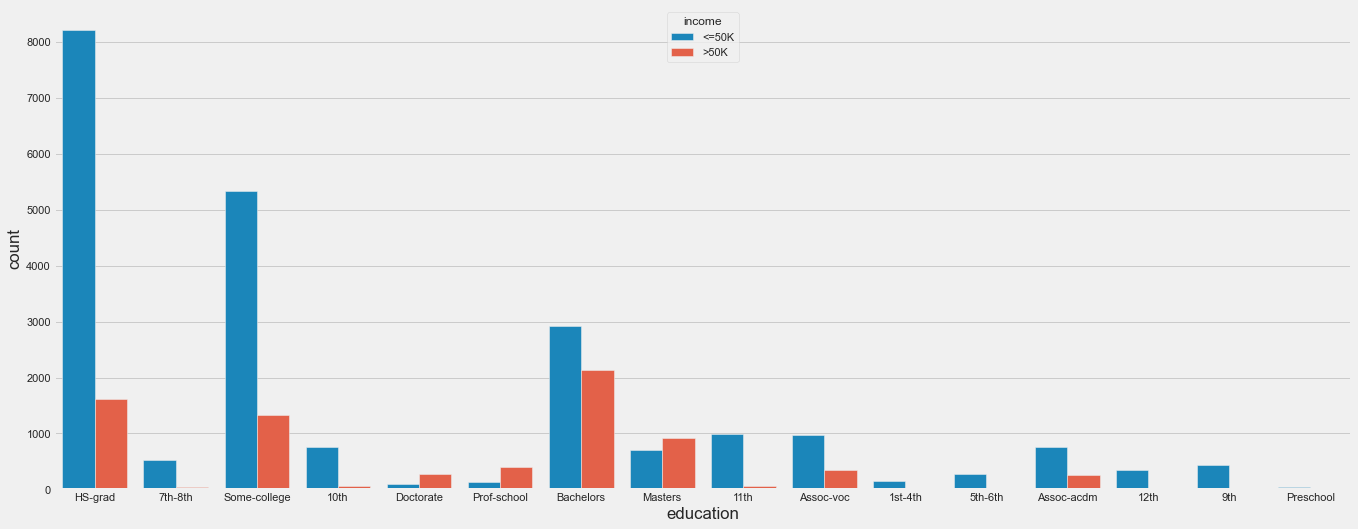

In [24]:
sns.countplot(x='education', hue='income', data = df)

### marital.status

In [25]:
df['marital.status'].value_counts()

Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [26]:
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
df['marital.status'] = df['marital.status'].replace(['Divorced', 'Widowed'], 'Separated')
df['marital.status'] = df['marital.status'].replace('Never-married', 'Single')

df['marital.status'].value_counts()

Married      14450
Single        9711
Separated     5978
Name: marital.status, dtype: int64

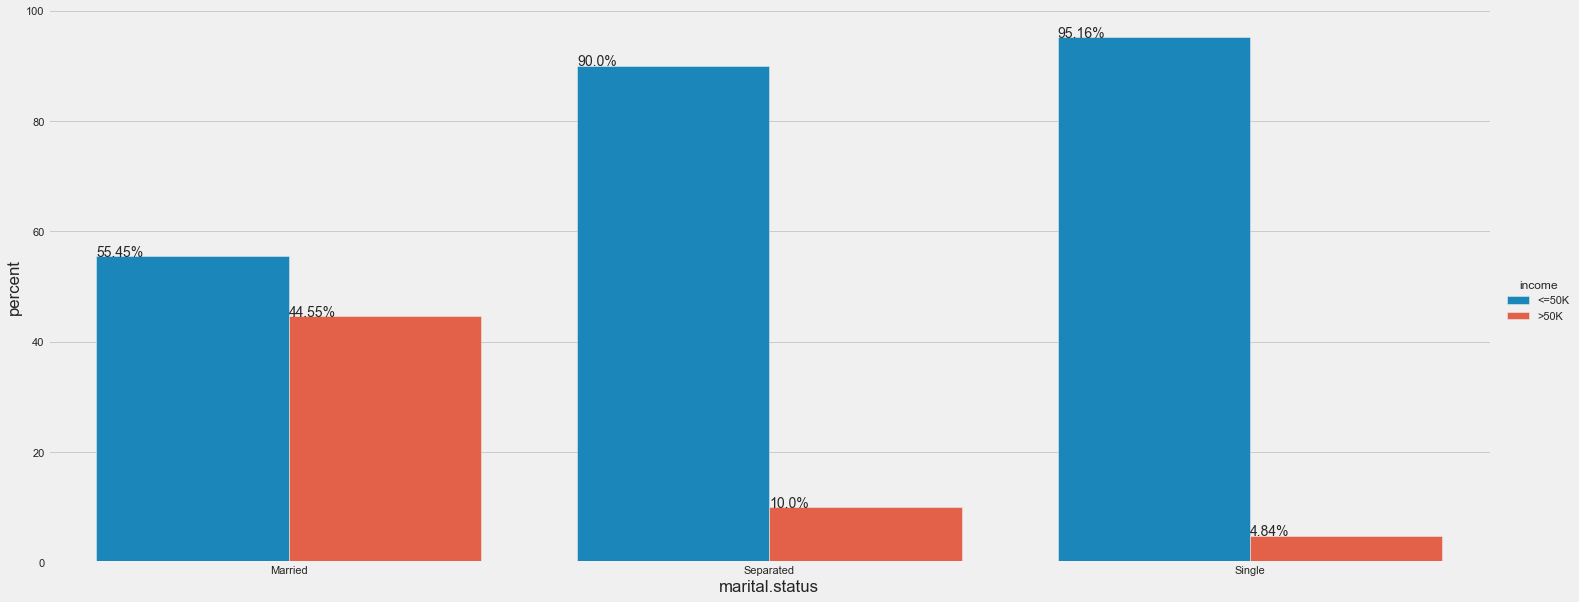

In [27]:
cat_hue('marital.status','income')

### occupation

In [28]:
df['occupation'].value_counts()

Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
df['occupation'] = df['occupation'].replace('Prof-specialty', 'Professional')
df['occupation'] = df['occupation'].replace(['Priv-house-serv', 'Protective-serv', 'Other-service'], 'Service')
df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-Collar')
df['occupation'] = df['occupation'].replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support'], 'Blue-Collar')

df['occupation'].value_counts()

Blue-Collar     10808
White-Collar     7710
Professional     4034
Service          3994
Sales            3584
Armed-Forces        9
Name: occupation, dtype: int64

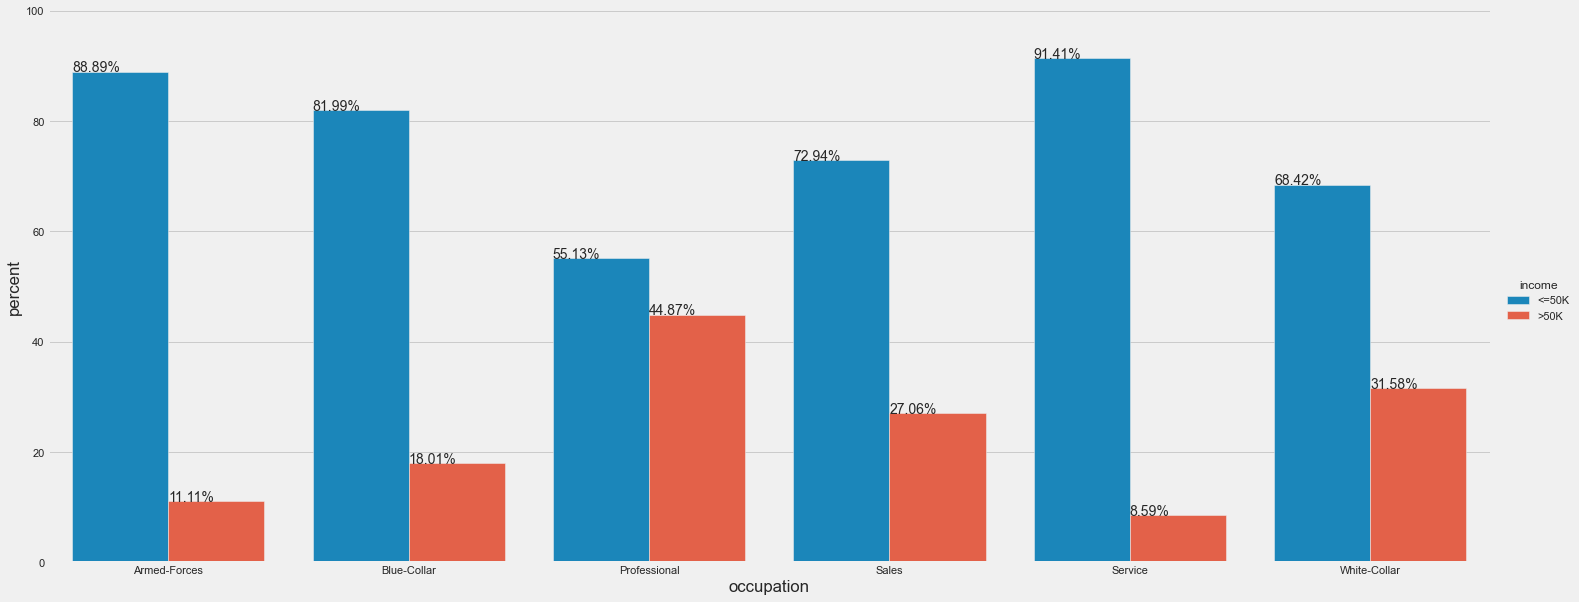

In [30]:
cat_hue('occupation','income')

### race

In [31]:
df['race'].value_counts()

White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [32]:
df['race'] = df['race'].replace(['Amer-Indian-Eskimo','Other'], 'Other')

df['race'].value_counts()

White                 25912
Black                  2816
Asian-Pac-Islander      894
Other                   517
Name: race, dtype: int64

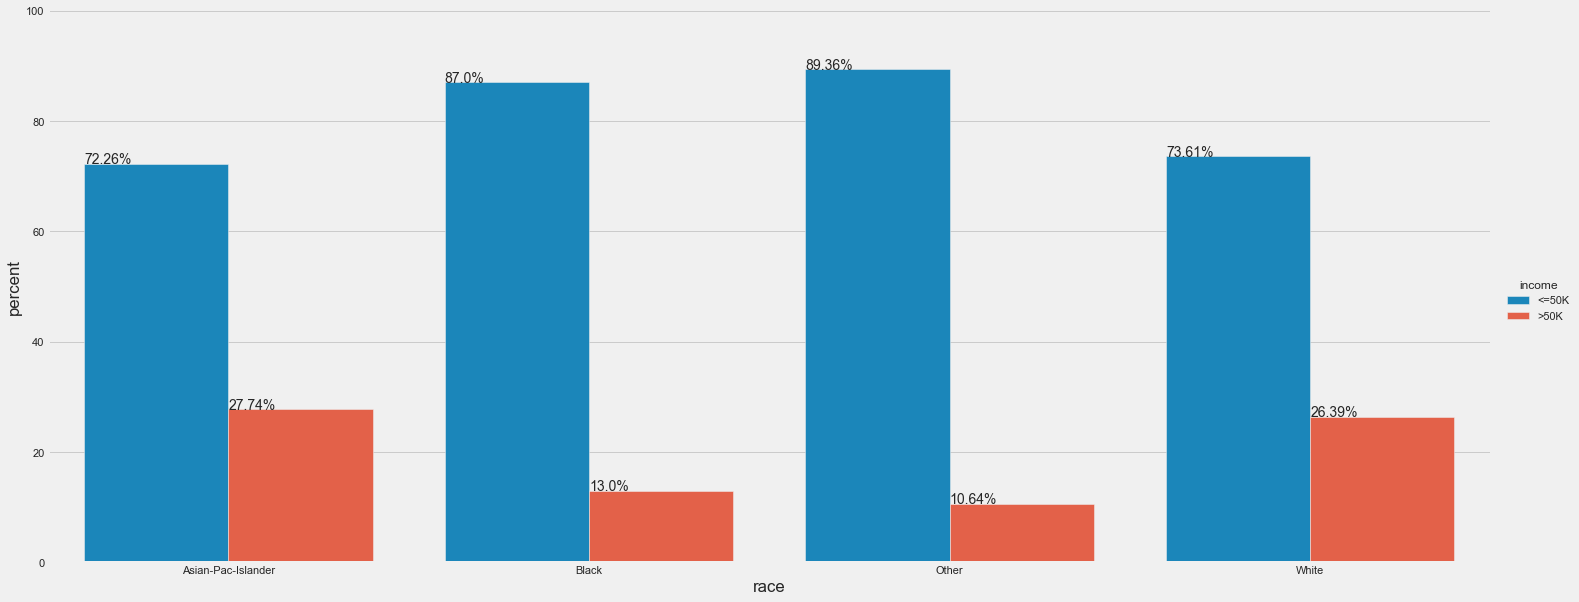

In [33]:
cat_hue('race','income')

### sex

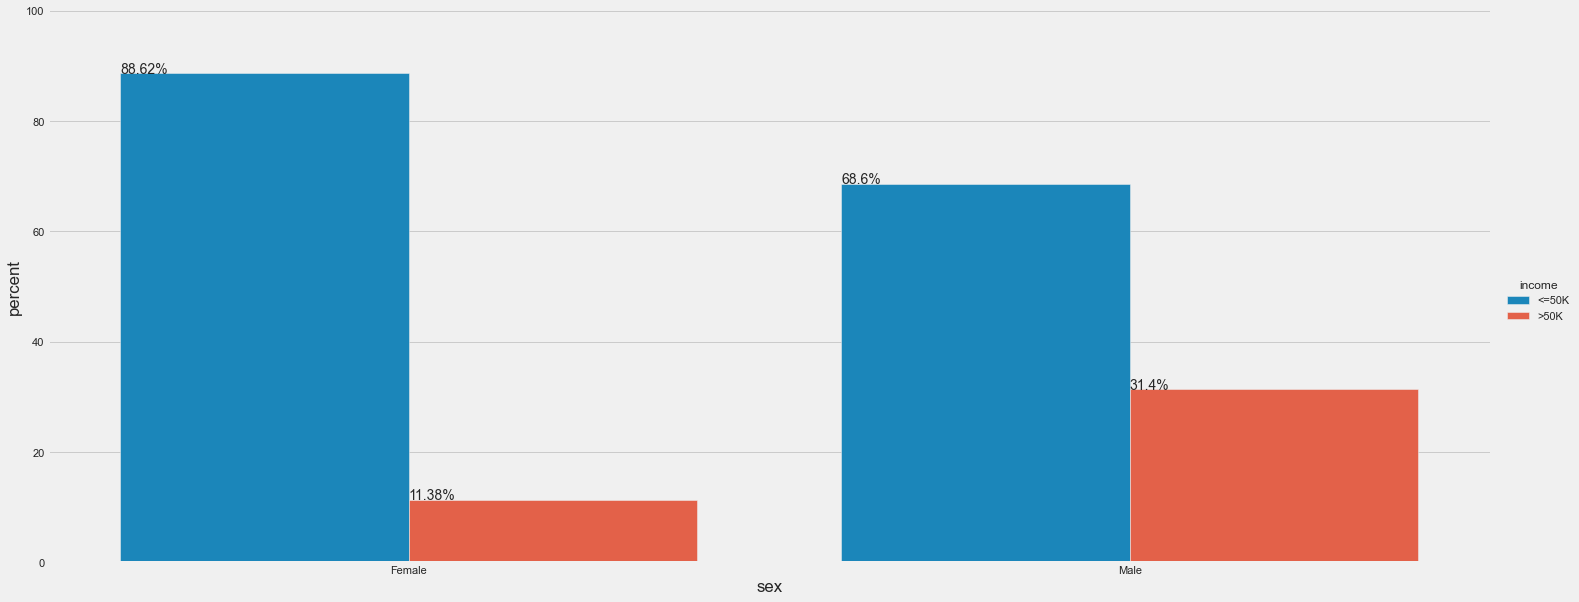

In [34]:
cat_hue('sex','income')

In [35]:
df['sex.bin'] = df['sex'].map({'Female': 0, 'Male': 1})

### capital.gain

<AxesSubplot:xlabel='capital.gain', ylabel='Count'>

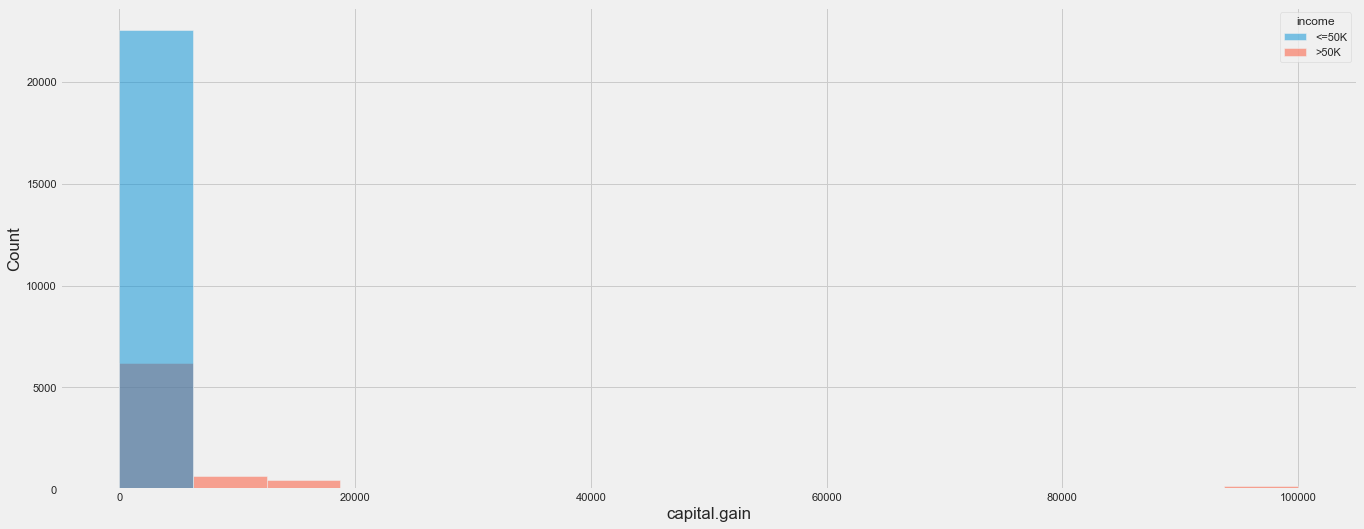

In [36]:
sns.histplot(x='capital.gain', hue='income', data = df)

In [37]:
df['capital.gain.bool'] = np.where(df['capital.gain']== 0, 'No', 'Yes')

### capital.loss

<AxesSubplot:xlabel='capital.loss', ylabel='Count'>

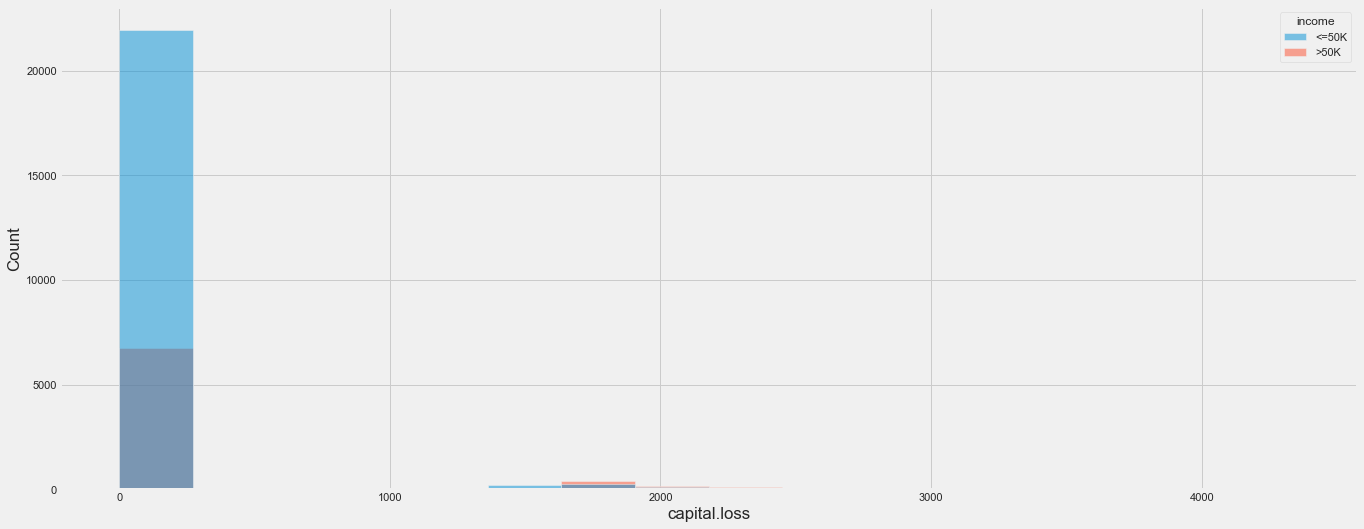

In [38]:
sns.histplot(x='capital.loss', hue='income', data = df)

In [39]:
df['capital.loss.bool'] = np.where(df['capital.loss']== 0, 'No', 'Yes')

### hours.per.week

<AxesSubplot:xlabel='hours.per.week', ylabel='Count'>

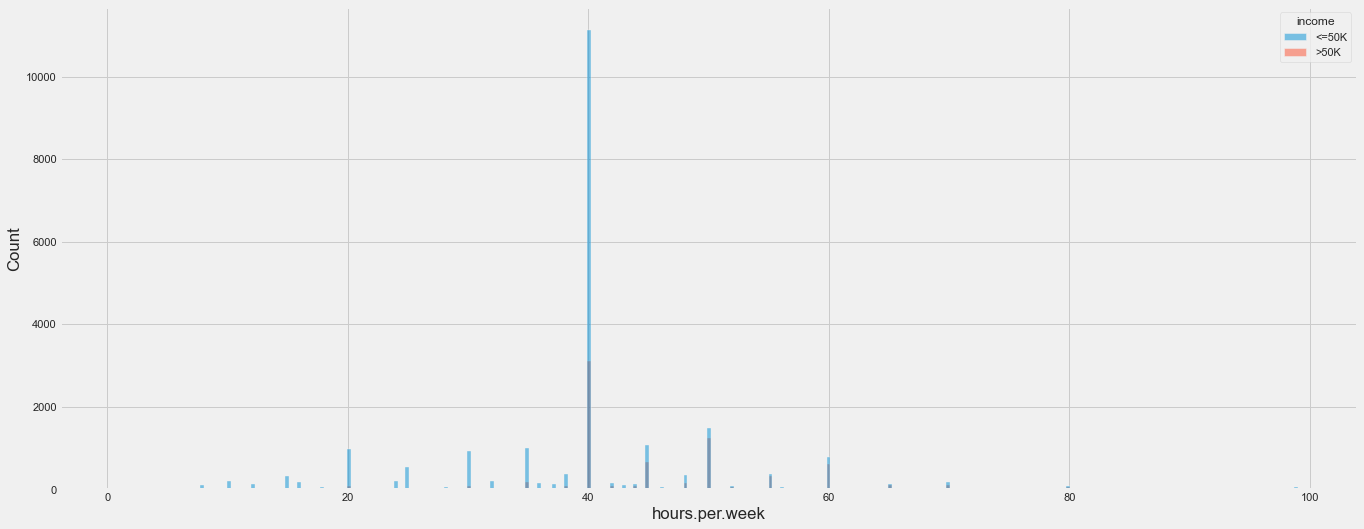

In [40]:
sns.histplot(x='hours.per.week', hue='income', data = df)

In [41]:
# add column 'working.time'

def group(x):
    if x['hours.per.week'] <30:
        group = 'Fewer Hours'
    elif x['hours.per.week'] >= 30 and x['hours.per.week'] <=40 :
        group = 'Normal Hours'
    else:
        group = 'Extra Hours'
    return group
df['working.time'] = df.apply(lambda x: group(x), axis=1)

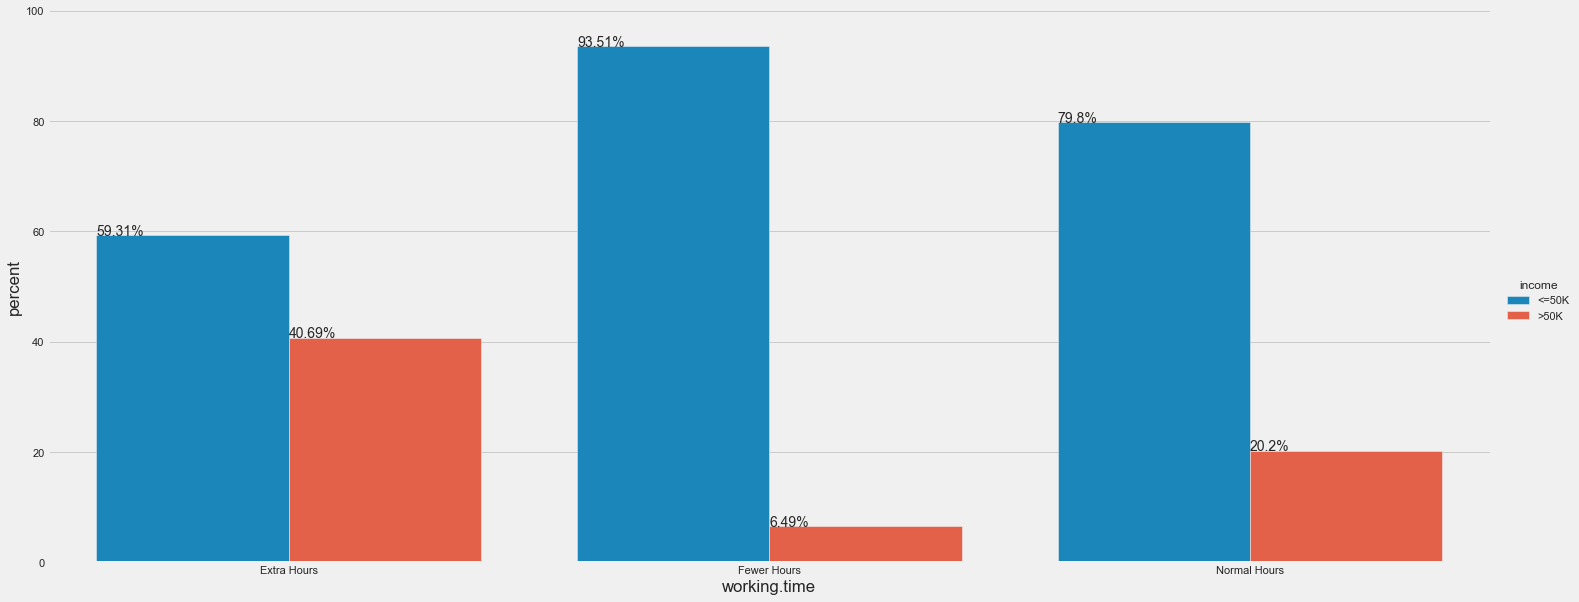

In [42]:
cat_hue('working.time','income')

### native.country

<AxesSubplot:xlabel='native.country', ylabel='count'>

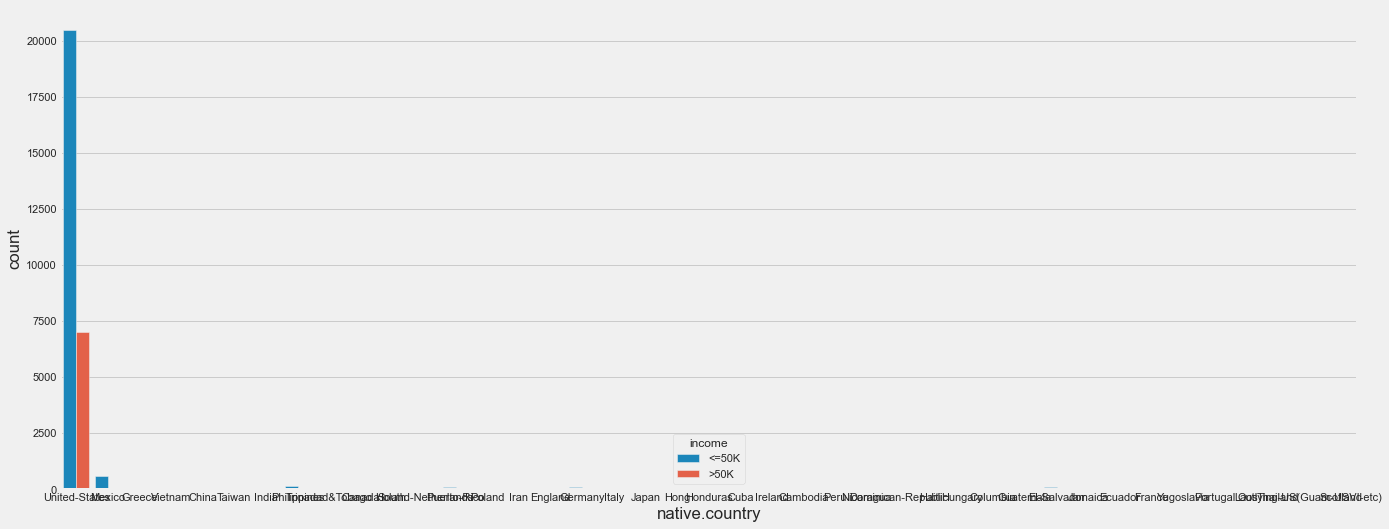

In [43]:
sns.countplot(x='native.country', hue='income', data = df)

In [44]:
df['native.country'] = np.where(df['native.country']== 'United-States', 'US', 'Other')
df.value_counts('native.country')

native.country
US       27487
Other     2652
dtype: int64

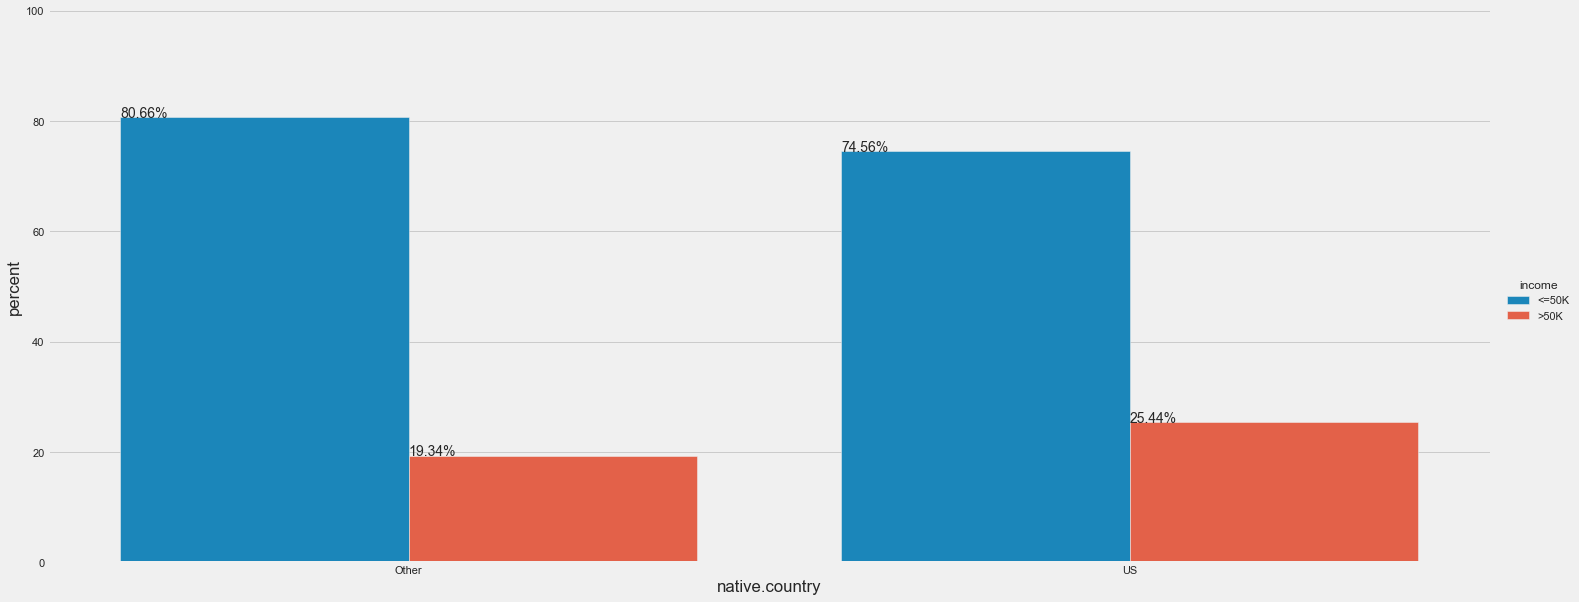

In [45]:
cat_hue('native.country','income')

### income

<AxesSubplot:xlabel='income', ylabel='count'>

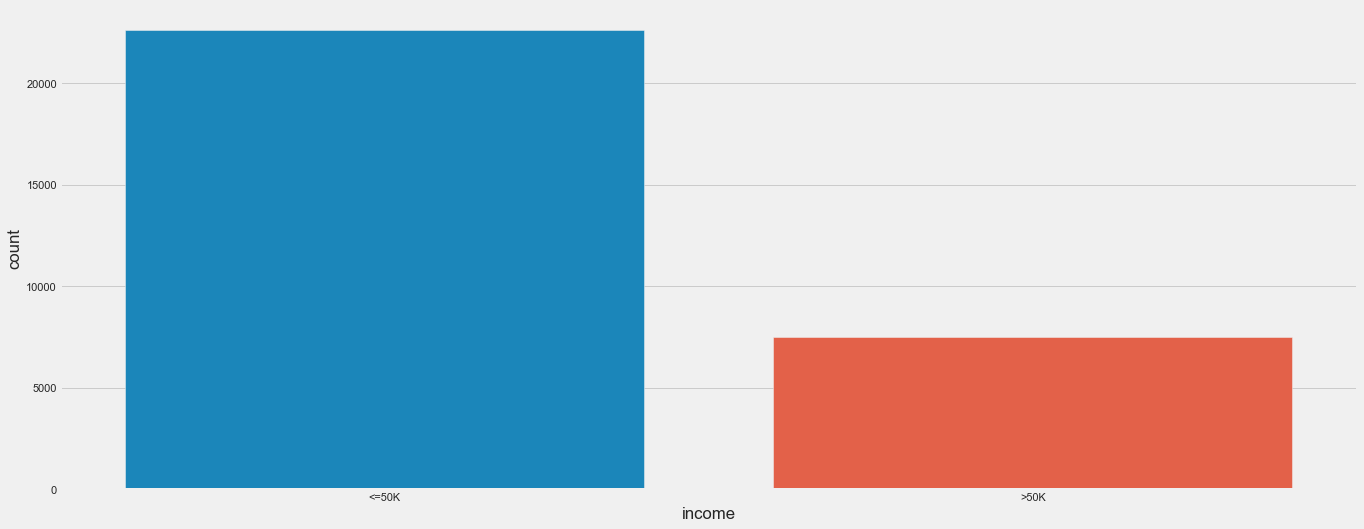

In [46]:
sns.countplot(x='income', data = df)

In [47]:
df['income'] = np.where(df['income']== '<=50K', 0, 1)

df['income'].value_counts()

0    22633
1     7506
Name: income, dtype: int64

## Remove Feature

### fnlwgt

In [48]:
#df = df.drop('fnlwgt', axis=1)

### education/education.num

In [49]:
#df = df.drop('education.num', axis=1)

## Matrix Correlation

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                30139 non-null  int64 
 1   workclass          30139 non-null  object
 2   fnlwgt             30139 non-null  int64 
 3   education          30139 non-null  object
 4   education.num      30139 non-null  int64 
 5   marital.status     30139 non-null  object
 6   occupation         30139 non-null  object
 7   relationship       30139 non-null  object
 8   race               30139 non-null  object
 9   sex                30139 non-null  object
 10  capital.gain       30139 non-null  int64 
 11  capital.loss       30139 non-null  int64 
 12  hours.per.week     30139 non-null  int64 
 13  native.country     30139 non-null  object
 14  income             30139 non-null  int32 
 15  age.productive     30139 non-null  object
 16  sex.bin            30139 non-null  int64

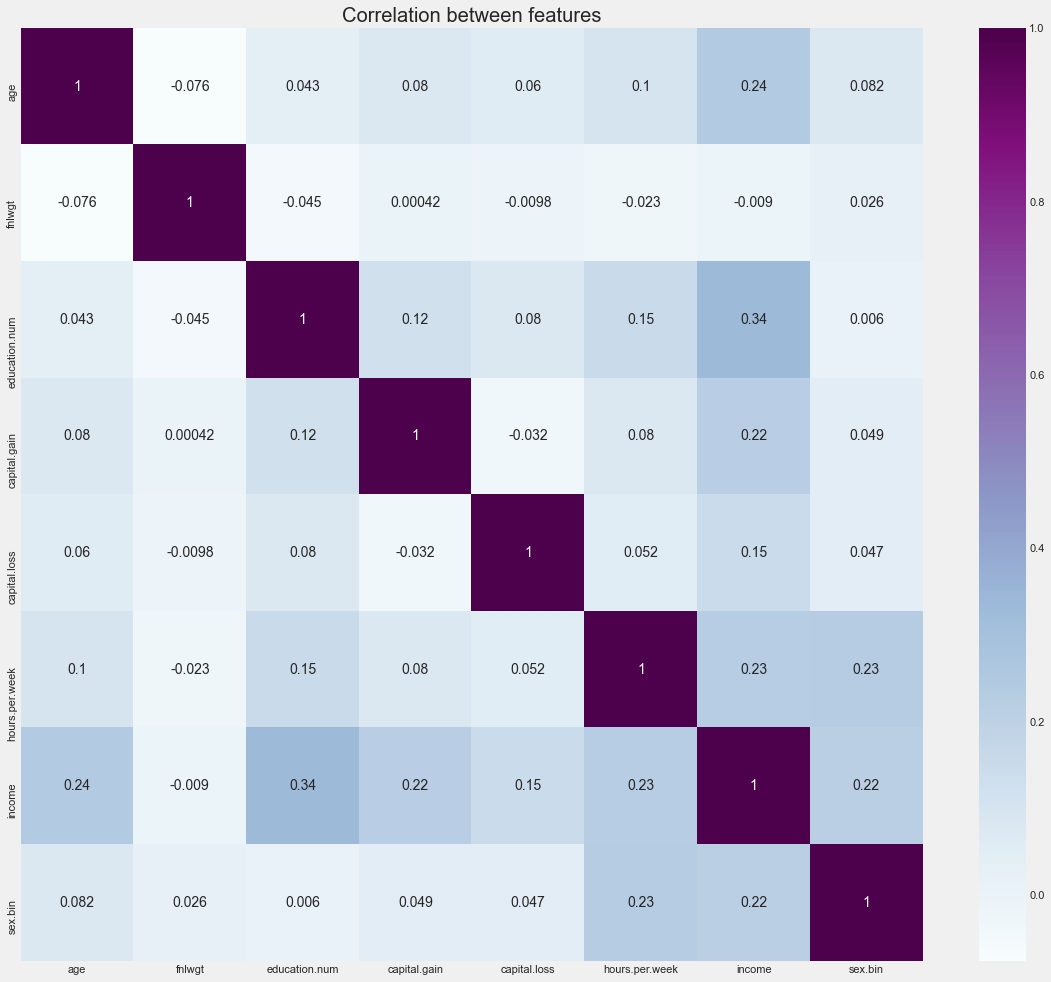

In [51]:
df_corr = df.corr()

plt.figure(figsize = (18, 16))
sns.heatmap(df_corr, annot=True, cmap='BuPu')
plt.title('Correlation between features')
plt.show()

In [52]:
df_corr['income'].sort_values(ascending=False)

income            1.000000
education.num     0.335413
age               0.242017
hours.per.week    0.229435
capital.gain      0.221204
sex.bin           0.216668
capital.loss      0.150026
fnlwgt           -0.008992
Name: income, dtype: float64

In [53]:
# the one hot encoded categorical features

df = pd.get_dummies(df, columns = ['workclass', 'marital.status', 'occupation', 'education', 'relationship', 'race', 'sex', 'native.country', 'age.productive', 'working.time', 'capital.gain.bool', 'capital.loss.bool'])
onehot_feature = df.drop(['education.num', 'age', 'hours.per.week', 'capital.gain', 'sex.bin', 'capital.loss','fnlwgt'], axis=1)

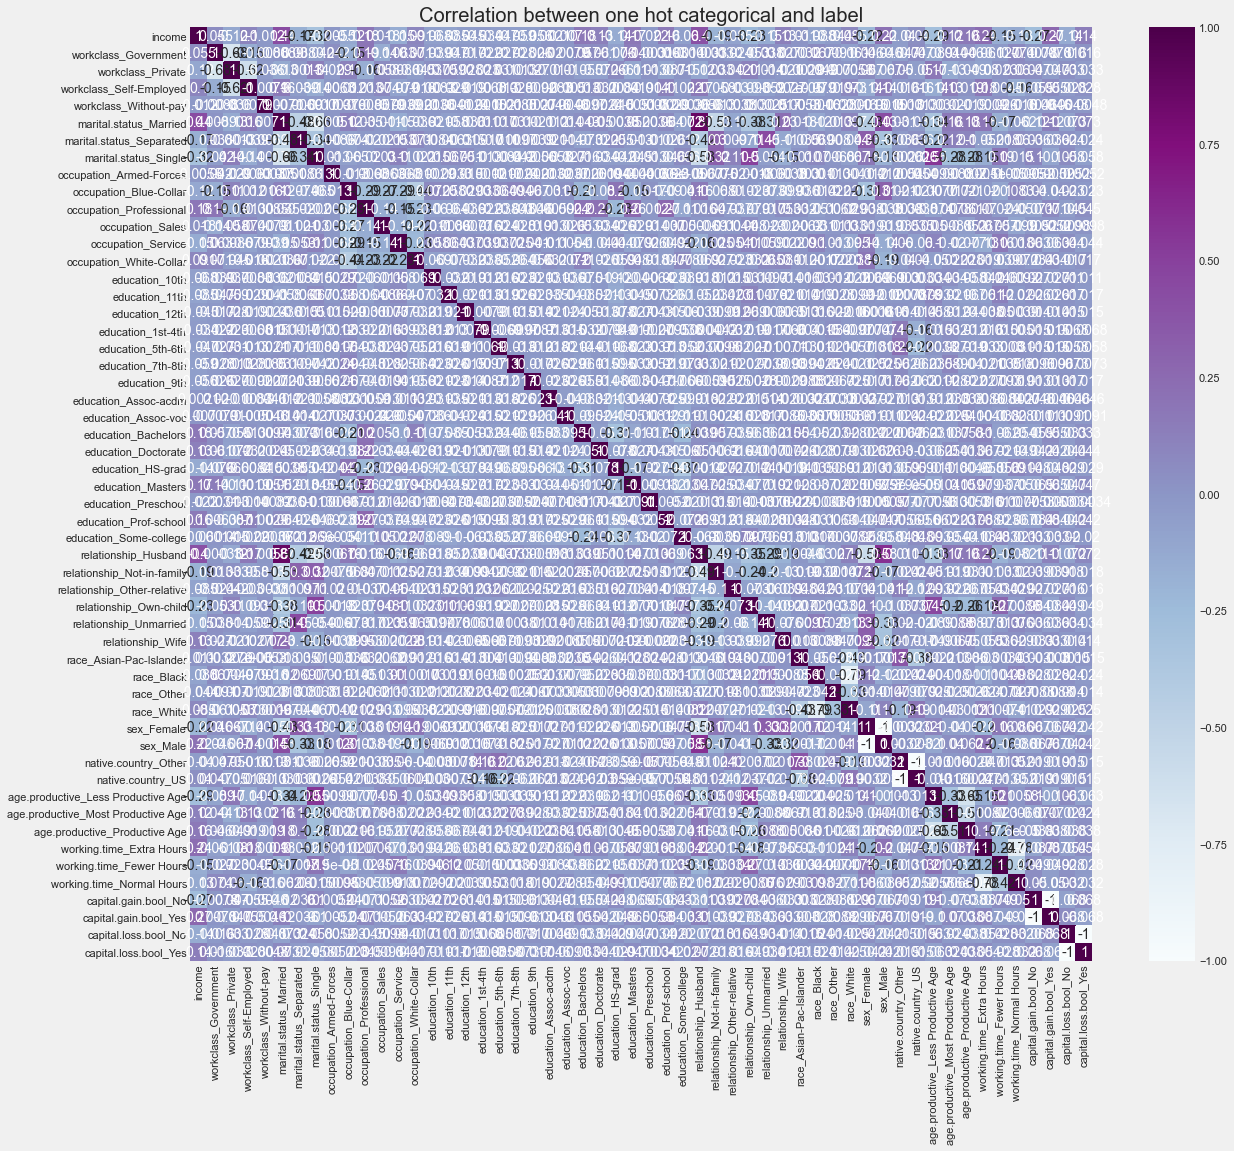

In [54]:
onehot_feature_corr = onehot_feature.corr()

plt.figure(figsize = (18, 16))
sns.heatmap(onehot_feature_corr, annot=True, cmap='BuPu')
plt.title('Correlation between one hot categorical and label')
plt.show()

In [55]:
onehot_feature_corr['income'].sort_values(ascending=False)

income                                1.000000
marital.status_Married                0.436044
relationship_Husband                  0.401140
capital.gain.bool_Yes                 0.266033
working.time_Extra Hours              0.241761
sex_Male                              0.216668
occupation_Professional               0.181471
education_Bachelors                   0.178902
education_Masters                     0.174234
age.productive_Productive Age         0.164326
education_Prof-school                 0.156468
capital.loss.bool_Yes                 0.137858
education_Doctorate                   0.129158
relationship_Wife                     0.125092
age.productive_Most Productive Age    0.119538
workclass_Self-Employed               0.100742
occupation_White-Collar               0.090533
race_White                            0.084781
workclass_Government                  0.054867
native.country_US                     0.039940
occupation_Sales                      0.018350
race_Asian-Pa

## Normalisation

In [56]:
variable = df.columns

for var in variable:
    df[var]= MinMaxScaler().fit_transform(df[var].values.reshape(len(df), 1))
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,sex.bin,workclass_Government,workclass_Private,...,age.productive_Less Productive Age,age.productive_Most Productive Age,age.productive_Productive Age,working.time_Extra Hours,working.time_Fewer Hours,working.time_Normal Hours,capital.gain.bool_No,capital.gain.bool_Yes,capital.loss.bool_No,capital.loss.bool_Yes
1,0.890411,0.080970,0.533333,0.0,1.000000,0.173469,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.506849,0.086061,0.200000,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.328767,0.170568,0.600000,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,0.232877,0.138072,0.533333,0.0,0.865473,0.448980,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.287671,0.093024,0.333333,0.0,0.865473,0.397959,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Sampling Dataset

In [57]:
# separating the independent and dependent variables
feature = ['education.num', 'age', 'hours.per.week', 'sex.bin', 'capital.gain']

X = df[feature]
y = df['income']
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

Shape of X is (30139, 5) and that of y is (30139,)


In [58]:
#Splitting the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 131)

print('Total data :', df.shape)
print('Total train :', X_train.shape)
print('Total test :', X_test.shape)

Total data : (30139, 61)
Total train : (21097, 5)
Total test : (9042, 5)


## Handling Imbalance Class

In [59]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

#Oversampling the data
smote = SMOTE(random_state = 131)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

# Modeling and Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### Random Forest

##### With imbalanced data

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=131)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.66
Recall (Test Set): 0.49
F1-Score (Test Set): 0.57
AUC: 0.70


In [62]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.8876143527515761
Test score:0.8101083831010838


##### With oversampled data

In [63]:
rf_o = RandomForestClassifier(random_state=131)
rf_o.fit(X_oversample,y_oversample)

y_pred_o = rf_o.predict(X_test)
eval_classification(rf_o, y_pred_o, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.55
Recall (Test Set): 0.64
F1-Score (Test Set): 0.59
AUC: 0.73


#### Xgboost

###### With imbalanced data

In [64]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=131)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[12:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.83
Precision (Test Set): 0.76
Recall (Test Set): 0.51
F1-Score (Test Set): 0.61
AUC: 0.73


In [65]:
print('Train score: ' + str(xg.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.8474664644262218
Test score:0.8345498783454988


###### With oversampled data

In [66]:
X_train_val = X_train.values
X_test_val = X_test.values

xg_o = XGBClassifier(random_state=131)
xg_o.fit(X_oversample, y_oversample)

y_pred_o = xg_o.predict(X_test_val)
eval_classification(xg_o, y_pred_o, X_oversample, y_oversample, X_test, y_test)

[12:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: feature_names mismatch: ['education.num', 'age', 'hours.per.week', 'sex.bin', 'capital.gain'] ['f0', 'f1', 'f2', 'f3', 'f4']
expected hours.per.week, education.num, capital.gain, age, sex.bin in input data
training data did not have the following fields: f2, f4, f3, f0, f1

# Tuning Hyperparameters

##### Random Forest

###### With imbalanced data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#List of Hyperparameters to be tested 
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # number of subtree
                       bootstrap = [True], # use bootstrapping or not 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum depth tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # The minimum samples on the node to split into new leaves 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # The minimum samples on a leaf to allow new leaf to form 
                       max_features = ['auto', 'sqrt', 'log2'], # Number of features to consider in each split 
                       n_jobs = [-1], # Cores for parallel computation. -1 to use all cores 
                      )

# Init
rf = RandomForestClassifier(random_state=131)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=131, scoring='accuracy')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

###### With oversampled data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#List of Hyperparameters to be tested i
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # number of subtree
                       bootstrap = [True], # use bootstrapping or not 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum depth tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # The minimum samples on the node to split into new leaves
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # The minimum samples on a leaf to allow new leaf to form
                       max_features = ['auto', 'sqrt', 'log2'], # Number of features to consider in each split 
                       n_jobs = [-1], # Cores for parallel computation. -1 to use all cores 
                      )

# Init
rf = RandomForestClassifier(random_state=131)
rf_o_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=131, scoring='accuracy')
rf_o_tuned.fit(X_oversample,y_oversample)

# Predict & Evaluation
y_pred_o = rf_o_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_o_tuned, y_pred_o, X_oversample, y_oversample, X_test, y_test)

##### Xgboost

###### With imbalanced data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Hyperparameter to Directory
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=131)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=131, scoring='accuracy')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check the model performance
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

###### With oversampled data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Hyperparameter to Directory
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=131)
xg_o_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=131, scoring='accuracy')
xg_o_tuned.fit(X_oversample,y_oversample)

# Predict & Evaluation
y_pred_o = xg_o_tuned.predict(X_test_val)#Check the model performance
eval_classification(xg_o_tuned, y_pred_o, X_oversample, y_oversample, X_test, y_test)

# Feature importance

##### Random Forest

In [ ]:
#imbalanced data
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
#oversampled data
show_feature_importance(rf_o_tuned.best_estimator_)


##### Xgboost

In [ ]:
#imbalanced data
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
#oversampled data
show_feature_importance(xg_o_tuned.best_estimator_)

# Insight

### Performa Algoritma

Algoritma yang digunakan, yaitu Random Forest dan Xgboost 

1. Oversampling membuat hasil metrics pada Random Forest dan Xgboost turun.
2. Setelah di tuning hyperparameter, hasil metrics accuracy dan precision pada kedua algoritma cukup bagus.
3. Kedua algoritma memiliki feature importancenya yang berbeda. Penggunaan oversampling juga memengaruhi feature importance pada masing-masing algoritma sehingga terdapat sedikit perbedaan feature importance pada imbalanced data dan oversampled data.

### Insight